In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-linear-converge)

In [2]:
lamb = 10
exact = lambda x: sinh(lamb * x) / sinh(lamb) - 1

The following functions define the ODE.

In [3]:
p = lambda x: zeros(size(x))
q = lambda x: -(lamb**2) * ones(len(x))
r = lambda x: lamb**2 * ones(len(x))

We compare the computed solution to the exact one for increasing $n$.

In [4]:
N = array([int(2 * 10**d) for d in arange(1, 3.1, 0.25)])
err = zeros(len(N))
results = PrettyTable(["n", "error"])
for k, n in enumerate(N):
    x, u = FNC.bvplin(p, q, r, [0, 1], -1, 0, n)
    err[k] = norm(exact(x) - u, inf)
    results.add_row([n, err[k]])
print(results)

+------+-----------------------+
|  n   |         error         |
+------+-----------------------+
|  20  | 0.0037471006137431706 |
|  35  | 0.0012307958808570607 |
|  63  | 0.0003848512001198845 |
| 112  |  0.000122087055467901 |
| 200  | 3.831198680559478e-05 |
| 355  | 1.216083231792009e-05 |
| 632  | 3.837495240799349e-06 |
| 1124 | 1.213264558486138e-06 |
| 2000 | 3.832060194719489e-07 |
+------+-----------------------+


Each factor of 10 in $n$ reduces error by a factor of 100, which is indicative of second-order convergence.

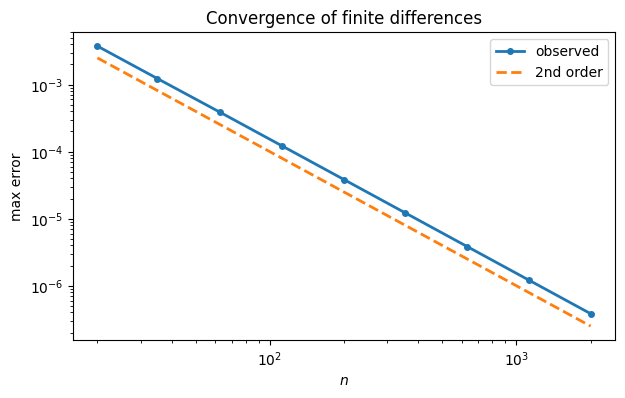

In [5]:
loglog(N, err, "-o", label="observed")
loglog(N, 1 / N**2, "--", label="2nd order")
xlabel("$n$"),  ylabel("max error")
legend(),  title("Convergence of finite differences");